In [14]:
import sagas.graph.dgraph_helper as helper
import pydgraph
client=helper.reset('''
    name: string @index(exact, term) .
    rated: uid @reverse @count .
    title: string @lang .
''')

In [15]:
import json_utils
feed_json=json_utils.read_json_file('data/graph/alice.json')
_=helper.set_json(client, feed_json)

In [19]:
helper.run_q(client, '''{
  data(func: eq(name, "Alice")) {
    name
    car @facets
    title
    friend @facets {
      name
      car @facets
      title@ru
    }
  }
}''')


{
  "data": [
    {
      "name": "Alice",
      "car|since": "2006-02-02T13:02:09Z",
      "car": "MA0123",
      "friend": [
        {
          "name": "Bob",
          "car|since": "2006-02-02T13:01:09Z",
          "car": "MA0134",
          "title@ru": "Russian",
          "friend|close": true,
          "friend|relative": false
        },
        {
          "name": "Charlie",
          "title@ru": "Russian",
          "friend|close": false,
          "friend|relative": true
        },
        {
          "name": "Dave",
          "friend|close": true,
          "friend|relative": true
        }
      ]
    }
  ]
}


In [47]:
import sagas.graph.dgraph_helper as helper
import pydgraph
import json_utils
from tqdm import tqdm

client=helper.reset('''
    name: string @index(exact, term) .
    nsubj: string @index(exact, term) .
    dobj: string @index(exact) .
    pobj: string @index(exact) .
    attr: string @index(exact) .
    sents: string @index(fulltext) @lang .
    lemmas: string @index(term) .
    verbs: string @index(term) .
''')

def list_with_suffix(dir, suffix):
    import os
    rs=[]
    for root, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith(suffix):
                rs.append(os.path.join(root, file))
    return rs

files=list_with_suffix('data/graph', '_feed.json')
for file in tqdm(files):
    feed_json=json_utils.read_json_file(file)
    _=helper.set_json(client, feed_json)

100%|██████████| 5/5 [00:00<00:00, 13.82it/s]


In [55]:
vars = {'$a': 'afraid'}
helper.query_with_vars(client, '''query data($a: string){
  data(func: anyofterms(lemmas, $a)) {
    sents@en:.
    sents@fr
    sents@de
    sents@zh
    sents@ja
    sents@es
    nsubj @facets
    verbs    
  }
}''', vars)

{
  "data": [
    {
      "sents@en:.": "Some people are afraid of spiders.",
      "sents@de": "Manche Menschen haben Angst vor Spinnen.",
      "nsubj|head": "are",
      "nsubj|text": "Some people",
      "nsubj": "people",
      "verbs": "be"
    },
    {
      "sents@en:.": "I'm not afraid to try.",
      "sents@fr": "Je n'ai pas peur d'essayer.",
      "nsubj|head": "'m",
      "nsubj|text": "I",
      "nsubj": "I",
      "verbs": "be"
    }
  ]
}


In [20]:
import numpy
array = numpy.array([[11 ,22, 33], [44, 55, 66], [77, 88, 99]]) 
print("Printing 2D Array")
print(array)
print("Choose random row from 2D array")
randomRow = numpy.random.randint(3, size=2)
print('pickup', randomRow)
print(array[randomRow,:])

Printing 2D Array
[[11 22 33]
 [44 55 66]
 [77 88 99]]
Choose random row from 2D array
pickup [2 0]
[[77 88 99]
 [11 22 33]]


In [40]:
from sagas.nlu.corpus_helper import filter_term, lines, divide_chunks
dataf = "/pi/ai/seq2seq/fra-eng-2019/fra.txt"
pairs = lines(dataf)
total=len(pairs)
print('total', total)
array = numpy.array(pairs)
random_rows = numpy.random.randint(total, size=10)
print('pickup', random_rows)
print(array[random_rows,:])

total 167130
pickup [144859 120344  68308  48399  66086  44530  12360 103419 108060  56722]
[["It's not just illegal, it's also dangerous."
  "Ce n'est pas simplement illégal, c'est également dangereux.\n"]
 ['Termites are destroying the houses.'
  'Les termites détruisent les maisons.\n']
 ['The meeting was held here.' "La réunion s'est tenue là.\n"]
 ['These are my suitcases.' 'Ce sont mes valises.\n']
 ['I usually get up at eight.' 'Je me lève généralement à huit heures.\n']
 ['Do you have a question?' 'Avez-vous une question\u202f?\n']
 ['Tom works there.' 'Tom y travaille.\n']
 ["I didn't think you'd be so late."
  "Je n'ai pas pensé que vous seriez tellement en retard.\n"]
 ['English is also studied in China.'
  "L'anglais est aussi étudié en Chine.\n"]
 ['All I think about is you.' "Tout ce dont je pense, c'est toi.\n"]]


In [44]:
rows=array[random_rows,:]
for r in rows:
    print(r[0])
    print('\t', r[1].strip())

It's not just illegal, it's also dangerous.
	 Ce n'est pas simplement illégal, c'est également dangereux.
Termites are destroying the houses.
	 Les termites détruisent les maisons.
The meeting was held here.
	 La réunion s'est tenue là.
These are my suitcases.
	 Ce sont mes valises.
I usually get up at eight.
	 Je me lève généralement à huit heures.
Do you have a question?
	 Avez-vous une question ?
Tom works there.
	 Tom y travaille.
I didn't think you'd be so late.
	 Je n'ai pas pensé que vous seriez tellement en retard.
English is also studied in China.
	 L'anglais est aussi étudié en Chine.
All I think about is you.
	 Tout ce dont je pense, c'est toi.


In [23]:
from sagas.nlu.corenlp_helper import langs, extract_lemma, extract_pos
sents='Apple is looking at buying U.K. startup for $1 billion'
nlp=langs['en']()
doc = nlp(sents)
extract_lemma(doc)

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/pi/ai/corenlp/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Done loading processors!
---


,lemma,word
0,Apple,Apple
1,be,is
2,look,looking
3,at,at
4,buy,buying
5,U.K.,U.K.
6,startup,startup
7,for,for
8,$,$
9,1,1


text: Apple 	lemma: Apple	upos: PROPN	xpos: NNP
text: is 	lemma: be	upos: AUX	xpos: VBZ
text: looking 	lemma: look	upos: VERB	xpos: VBG
text: at 	lemma: at	upos: SCONJ	xpos: IN
text: buying 	lemma: buy	upos: VERB	xpos: VBG
text: U.K. 	lemma: U.K.	upos: PROPN	xpos: NNP
text: startup 	lemma: startup	upos: NOUN	xpos: NN
text: for 	lemma: for	upos: ADP	xpos: IN
text: $ 	lemma: $	upos: SYM	xpos: $
text: 1 	lemma: 1	upos: NUM	xpos: CD
text: billion 	lemma: billion	upos: NUM	xpos: CD
('Apple', '3', 'nsubj')
('is', '3', 'aux')
('looking', '0', 'root')
('at', '5', 'mark')
('buying', '3', 'advcl')
('U.K.', '7', 'compound')
('startup', '5', 'obj')
('for', '9', 'case')
('$', '5', 'obl')
('1', '9', 'compound')
('billion', '9', 'nummod')


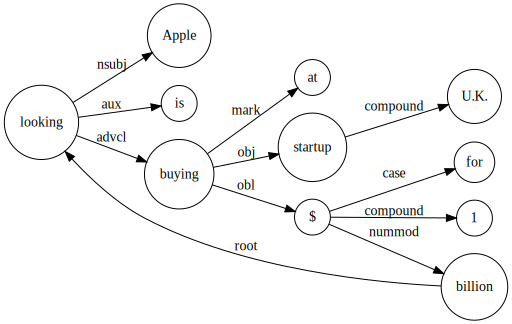

In [25]:
from sagas.nlu.corenlp_helper import CoreNlpViz, nlp_en, nlp_fr
viz=CoreNlpViz()
viz.analyse(sents, nlp)
viz.f

In [32]:
import spacy

nlp_spacy = spacy.load('en_core_web_sm')
doc = nlp_spacy(sents)

In [39]:
def put_entities(doc, props):
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
        props[ent.label_]=ent.text
        facet="%s|%s"%(ent.label_, 'loc')
        props[facet]="%d %d"%(ent.start_char, ent.end_char)

sentences=["Apple is looking at buying U.K. startup for $1 billion"]
dataset=[]
for sents in sentences:
    props={}
    doc = nlp_spacy(sents)
    put_entities(doc, props)
    dataset.append(props)
print(json.dumps(dataset, indent=2))

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY
[
  {
    "ORG": "Apple",
    "ORG|loc": "0 5",
    "GPE": "U.K.",
    "GPE|loc": "27 31",
    "MONEY": "$1 billion",
    "MONEY|loc": "44 54"
  }
]


In [31]:
doc = nlp_spacy(u"Mr. Best flew to New York on Saturday morning.")
ents = list(doc.ents)
print(ents[0].label)
print(ents[0].label_)
print(ents[0].text)

378
PERSON
Best


In [37]:
def doc_collect(doc):
    toks={'text':[], 'lemma':[], 'pos':[], 'tag':[], 'dep':[]}
    for token in doc:
        # print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        #        token.shape_, token.is_alpha, token.is_stop)
        toks['text'].append(token.text)
        toks['lemma'].append(token.lemma_)
        toks['pos'].append(token.pos_)
        toks['tag'].append(token.tag_)
        toks['dep'].append(token.dep_)
    return toks

doc = nlp_spacy(u'Apple is looking at buying U.K. startup for $1 billion')
toks=doc_collect(doc)
lemmas=' '.join(toks['lemma'])
print(lemmas)

apple be look at buy u.k. startup for $ 1 billion
